# VGGNet

### MiniVGGNet Archtecture

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [ ]:

class MiniVGGNet:
    @staticmethod
    def build(width, height, depth, classes):
        # initialize the model along with the input shape to be
        # "channels last" and the channels dimension itself
        model = Sequential()
        inputShape = (height, width, depth)
        chanDim = -1

        # first CONV(3x3/32) => RELU => CONV(3x3/32) => RELU => POOL(2x2/s=2)
        model.add(Conv2D(32,(3,3),padding = 'same', input_shape = inputShape))
        model.add(Activation('relu'))
          #batch normal
        model.add(BatchNormalization(axis = chanDim))
        
        model.add(Conv2D(32,(3,3),padding = 'same'))
        model.add(Activation('relu'))
        
        model.add(BatchNormalization(axis = chanDim))
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        
          # Dropout
        model.add(Dropout(0.3))

        # second CONV(3x3/64) => RELU => CONV(3x3/64) => RELU => POOL(2x2/s=2) 
        model.add(Conv2D(64,(3,3),padding = 'same'))
        model.add(Activation('relu'))
        
        model.add(BatchNormalization(axis = chanDim))
        model.add(Conv2D(64,(3,3),padding = 'same'))
        model.add(Activation('relu'))
        
        model.add(BatchNormalization(axis = chanDim))
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

        model.add(Dropout(0.3))

        # FC(512) => RELU layers
        model.add(Flatten())
        model.add(Dense(512))
        model.add(Activation('relu'))
        
        model.add(BatchNormalization(axis = chanDim))

        model.add(Dropout(0.5))

        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation('softmax'))

        # return the constructed network architecture
        return model

### Mini VGGNet On MNIST

* 디스크에서 CIFAR-10 데이터 세트를 로드
* MiniVGGNet 아키텍처를 인스턴스화 
* 훈련 데이터를 사용하여 MiniVGGNet을 훈련
* 테스트 데이터로 네트워크 성능을 평가

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10

import matplotlib.pyplot as plt
import numpy as np

Loading CIFAR-10 data

In [ ]:
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

In [ ]:
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [ ]:
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
                "dog", "frog", "horse", "ship", "truck"]

Compiling model

In [ ]:
opt = SGD(lr=0.01, decay=0.01/30, momentum=0.9, nesterov=True)
model = MiniVGGNet.build(width=32, height=32, depth=3, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt,
                metrics=["accuracy"])

**Nesterov momentum**

$$v_{t+1} = \mu v_t - \epsilon g(\theta_t+\mu v_t)$$
$$\theta_{t+1}=\theta_t+v_{t+1}$$

모멘텀 공식과 거의 유사하지만, 현재 위치의 그래디언트 $g(\theta_t)$를 이용하는 것이 아니고 현재 위치에서 속도 $\mu v_t$ 만큼 전진한 후의 그래디언트 $g(\theta_t + \mu v_t)$를 이용

<img src="https://ruder.io/content/images/2016/09/nesterov_update_vector.png" width=400>

Training network

In [ ]:
epochs = 30

H = model.fit(trainX, trainY, validation_data=(testX, testY),
    batch_size=64, epochs=epochs, verbose=1)

Epoch 1/30
782/782 [==============================] - 12s 15ms/step - loss: 1.8097 - accuracy: 0.3372 - val_loss: 1.4360 - val_accuracy: 0.4722
Epoch 2/30
782/782 [==============================] - 11s 15ms/step - loss: 1.3879 - accuracy: 0.4983 - val_loss: 1.1958 - val_accuracy: 0.5660
Epoch 3/30
782/782 [==============================] - 11s 14ms/step - loss: 1.2070 - accuracy: 0.5658 - val_loss: 1.0816 - val_accuracy: 0.6217
Epoch 4/30
782/782 [==============================] - 11s 14ms/step - loss: 1.0917 - accuracy: 0.6103 - val_loss: 0.9970 - val_accuracy: 0.6439
Epoch 5/30
782/782 [==============================] - 11s 15ms/step - loss: 1.0063 - accuracy: 0.6431 - val_loss: 0.9200 - val_accuracy: 0.6742
Epoch 6/30
782/782 [==============================] - 11s 14ms/step - loss: 0.9451 - accuracy: 0.6657 - val_loss: 0.8496 - val_accuracy: 0.6994
Epoch 7/30
782/782 [==============================] - 11s 15ms/step - loss: 0.8860 - accuracy: 0.6849 - val_loss: 0.8242 - val_accuracy:

Evaluating network

In [ ]:
model.evaluate(testX, testY, batch_size=64)

157/157 [==============================] - 1s 6ms/step - loss: 0.6015 - accuracy: 0.7931


[0.6015037894248962, 0.7930999994277954]

Plot the training loss and accuracy

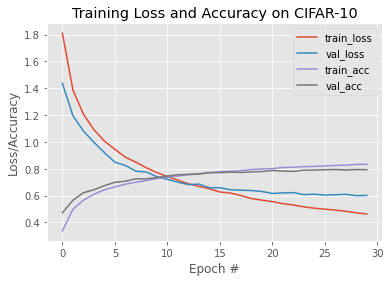

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on CIFAR-10")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

### 실습1. Dropout을 적용하여 모델 학습

Compiling model

In [ ]:
opt = SGD(lr=0.01, decay=0.01/30, momentum=0.9, nesterov=True)
model = MiniVGGNet.build(width=32, height=32, depth=3, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt,
                metrics=["accuracy"])

Training network

In [ ]:
H = model.fit(trainX, trainY, validation_data=(testX, testY),
    batch_size=64, epochs=epochs, verbose=1)

Evaluating network

In [ ]:
model.evaluate(testX, testY, batch_size=64)

Plot the training loss and accuracy

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on CIFAR-10")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

### 실습2. 배치 정규화를 적용하고 모델 학습

Compiling model

In [ ]:
opt = SGD(lr=0.01, decay=0.01/30, momentum=0.9, nesterov=True)
model = MiniVGGNet.build(width=32, height=32, depth=3, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt,
                metrics=["accuracy"])

Training network

In [ ]:
H = model.fit(trainX, trainY, validation_data=(testX, testY),
    batch_size=64, epochs=epochs, verbose=1)

Epoch 1/30
782/782 [==============================] - 14s 18ms/step - loss: 1.6751 - accuracy: 0.4369 - val_loss: 1.3043 - val_accuracy: 0.5416
Epoch 2/30
782/782 [==============================] - 13s 17ms/step - loss: 1.2068 - accuracy: 0.5786 - val_loss: 1.0252 - val_accuracy: 0.6378
Epoch 3/30
782/782 [==============================] - 14s 18ms/step - loss: 1.0023 - accuracy: 0.6489 - val_loss: 0.8255 - val_accuracy: 0.7129
Epoch 4/30
782/782 [==============================] - 13s 17ms/step - loss: 0.8991 - accuracy: 0.6867 - val_loss: 0.7943 - val_accuracy: 0.7267
Epoch 5/30
782/782 [==============================] - 13s 17ms/step - loss: 0.8255 - accuracy: 0.7108 - val_loss: 0.7891 - val_accuracy: 0.7241
Epoch 6/30
782/782 [==============================] - 13s 17ms/step - loss: 0.7631 - accuracy: 0.7322 - val_loss: 0.8404 - val_accuracy: 0.7103
Epoch 7/30
782/782 [==============================] - 13s 17ms/step - loss: 0.7232 - accuracy: 0.7422 - val_loss: 0.6924 - val_accuracy:

Evaluating network

In [ ]:
model.evaluate(testX, testY, batch_size=64)

157/157 [==============================] - 1s 7ms/step - loss: 0.5432 - accuracy: 0.8160


[0.5432007908821106, 0.8159999847412109]

Plot the training loss and accuracy

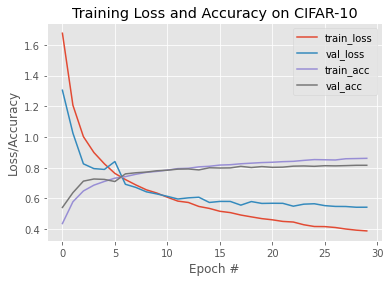

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on CIFAR-10")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()